## **Predicting E-Commerce Order Profit Using Feature Engineering and Ensemble Models**

## Introduction
Welcome to our collaborative project on the DataCo Smart Supply Chain dataset, part of the **Fesmora Universitas Negeri Malang Big Data Competition**. This dataset provides a comprehensive view into the global supply chain activities of DataCo Global, covering key aspects such as provisioning, production, sales, and commercial distribution. Sourced directly from the DataCo Smart Supply Chain Dataset, it encompasses a wide range of information that can be leveraged for predictive analytics and operational optimization.



### Overview of the Dataset
**Scope:** The dataset captures transactions related to products such as clothing, sporting goods, and electronics. It includes detailed records on customer orders, payment methods, delivery statuses, and geographic information.

**Key Information Included:**

* Type	:  Type of transaction made

* Days for shipping (real)	:  Actual shipping days of the purchased product

* Days for shipment (scheduled)	:  Days of scheduled delivery of the purchased product

* Benefit per order	:  Earnings per order placed

* Sales per customer	:  Total sales per customer made per customer

* Delivery Status	:  Delivery status of orders: Advance shipping , Late delivery , Shipping canceled , Shipping on time

* Late_delivery_risk	:  Categorical variable that indicates if sending is late (1), it is not late (0).

* Category Id	:  Product category code

* Category Name	:  Description of the product category

* Customer City	:  City where the customer made the purchase

* Customer Country	:  Country where the customer made the purchase
* Customer Email	:  Customer's email
* Customer Fname	:  Customer name
* Customer Id	:  Customer ID
* Customer Lname	:  Customer lastname
* Customer Password	:  Masked customer key
* Customer Segment	:  Types of Customers: Consumer , Corporate , Home Office
* Customer State	:  State to which the store where the purchase is registered belongs
* Customer Street	:  Street to which the store where the purchase is registered belongs
* Customer Zipcode	:  Customer Zipcode
* Department Id	:  Department code of store
* Department Name	:  Department name of store
* Latitude	:  Latitude corresponding to location of store
* Longitude	:  Longitude corresponding to location of store
* Market	:  Market to where the order is delivered : Africa , Europe , LATAM , Pacific Asia , USCA
* Order City	:  Destination city of the order
* Order Country	:  Destination country of the order
* Order Customer Id	:  Customer order code
order date (DateOrders)	:  Date on which the order is made
* Order Id	:  Order code
* Order Item Cardprod Id	:  Product code generated through the RFID reader
* Order Item Discount	:  Order item discount value
* Order Item Discount Rate	:  Order item discount percentage
* Order Item Id	:  Order item code
* Order Item Product Price	:  Price of products without discount
* Order Item Profit Ratio : Order Item Profit Ratio  
* Order Item Quantity : Number of products per order  
* Sales : Value in sales  
* Order Item Total : Total amount per order  
* Order Profit Per Order : Order Profit Per Order  
* Order Region : Region of the world where the order is delivered : Southeast Asia ,South Asia ,Oceania ,Eastern Asia, West Asia , West of USA , US Center , West Africa, Central Africa ,North Africa ,Western Europe ,Northern , Caribbean , South America ,East Africa ,Southern Europe , East of USA ,Canada ,Southern Africa , Central Asia , Europe , Central America, Eastern Europe , South of USA  
* Order State : State of the region where the order is delivered  
* Order Status : Order Status : COMPLETE , PENDING , CLOSED , PENDING_PAYMENT ,CANCELED , PROCESSING ,SUSPECTED_FRAUD ,ON_HOLD ,PAYMENT_REVIEW  
* Product Card Id : Product code  
* Product Category Id : Product category code  
* Product Description : Product Description  
* Product Image : Link of visit and purchase of the product  
* Product Name : Product Name  
* Product Price : Product Price  
* Product Status : Status of the product stock : If it is 1 not available , 0 the product is available  
* Shipping date (DateOrders) : Exact date and time of shipment  
* Shipping Mode : The following shipping modes are presented : Standard Class , First Class , Second Class , Same Day  


## **Import Packages**

In [39]:
!pip freeze > requirements.txt

In [1]:
!pip install catboost
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from hyperopt import fmin, tpe, hp, Trials
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import early_stopping
from sklearn.linear_model import ElasticNet

## **Data Wrangling**

### Gathering Data

In [2]:
# 1. Memuat dataset (sesuaikan path)
data = pd.read_csv('/content/drive/MyDrive/Fesmora_Project/Dataset Kedua.csv', encoding='ISO-8859-1')

### Assessing Data

In [3]:
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [5]:
data.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


In [6]:
print('Jumlah Cell Kosong/Blank :',data.isnull().sum().sum())

Jumlah Cell Kosong/Blank : 336209


In [7]:
print('Jumlah Cell Duplicate :',data.duplicated().sum())

Jumlah Cell Duplicate : 0


## **Cleaning Data**

In [8]:
# 2. Pembersihan data: Mengatasi format angka dengan koma
def clean_numeric(x):
    if isinstance(x, str):
        return float(x.replace(',', '')) if x.replace(',', '').replace('.', '').isdigit() else np.nan
    return x

numeric_columns = ['Order Item Total', 'Order Item Discount', 'Order Item Quantity',
                   'Order Item Profit Ratio', 'Latitude', 'Longitude', 'Order Profit Per Order']
for col in numeric_columns:
    data[col] = data[col].apply(clean_numeric)

data = data.drop(['Order Zipcode','Product Description'],axis=1)

# 3. Agregasi data berdasarkan Order Id
order_data = data.groupby('Order Id').agg({
    'Order Item Total': 'sum',
    'Order Item Discount': 'sum',
    'Order Item Quantity': 'sum',
    'Order Item Profit Ratio': 'mean',
    'Latitude': 'mean',
    'Longitude': 'mean',
    'Order Region': lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0],
    'Shipping Mode': lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0],
    'Market': lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0],
    'Order Country': lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0],
    'order date (DateOrders)': 'first',
    'shipping date (DateOrders)': 'first',
    'Order Profit Per Order': 'sum',
    'Customer Segment': lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0],
    'Order Status': lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0]
}).reset_index()


## **Feature Engginering**

In [9]:
# 4. Rekayasa Fitur (Feature Engineering)
order_data['Order Date'] = pd.to_datetime(order_data['order date (DateOrders)'], errors='coerce')
order_data['Shipping Date'] = pd.to_datetime(order_data['shipping date (DateOrders)'], errors='coerce')
order_data['Order Day of Week'] = order_data['Order Date'].dt.dayofweek
order_data['Order Month'] = order_data['Order Date'].dt.month
order_data['Shipping Delay'] = (order_data['Shipping Date'] - order_data['Order Date']).dt.days
order_data['Season'] = order_data['Order Month'].apply(lambda x: 'spring' if x in [3,4,5] else 'summer' if x in [6,7,8] else 'fall' if x in [9,10,11] else 'winter')
order_data['Delay Category'] = pd.cut(order_data['Shipping Delay'], bins=[-1, 0, 3, float('inf')], labels=['on-time', 'slight delay', 'major delay'])

# Fitur baru
order_data['Total_Discount'] = order_data['Order Item Total'] * order_data['Order Item Discount']
order_data['Quantity_Discount'] = order_data['Order Item Quantity'] * order_data['Order Item Discount']
order_data['Distance'] = np.sqrt(order_data['Latitude']**2 + order_data['Longitude']**2)  # Jarak sederhana dari koordinat

# 5. Penanganan Outlier pada Target
q1 = order_data['Order Profit Per Order'].quantile(0.25)
q3 = order_data['Order Profit Per Order'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
order_data = order_data[(order_data['Order Profit Per Order'] >= lower_bound) & (order_data['Order Profit Per Order'] <= upper_bound)]

# 6. Mengurutkan data berdasarkan 'Order Date'
order_data = order_data.sort_values(by='Order Date')

## **Exploratory Data Analysis (EDA)**

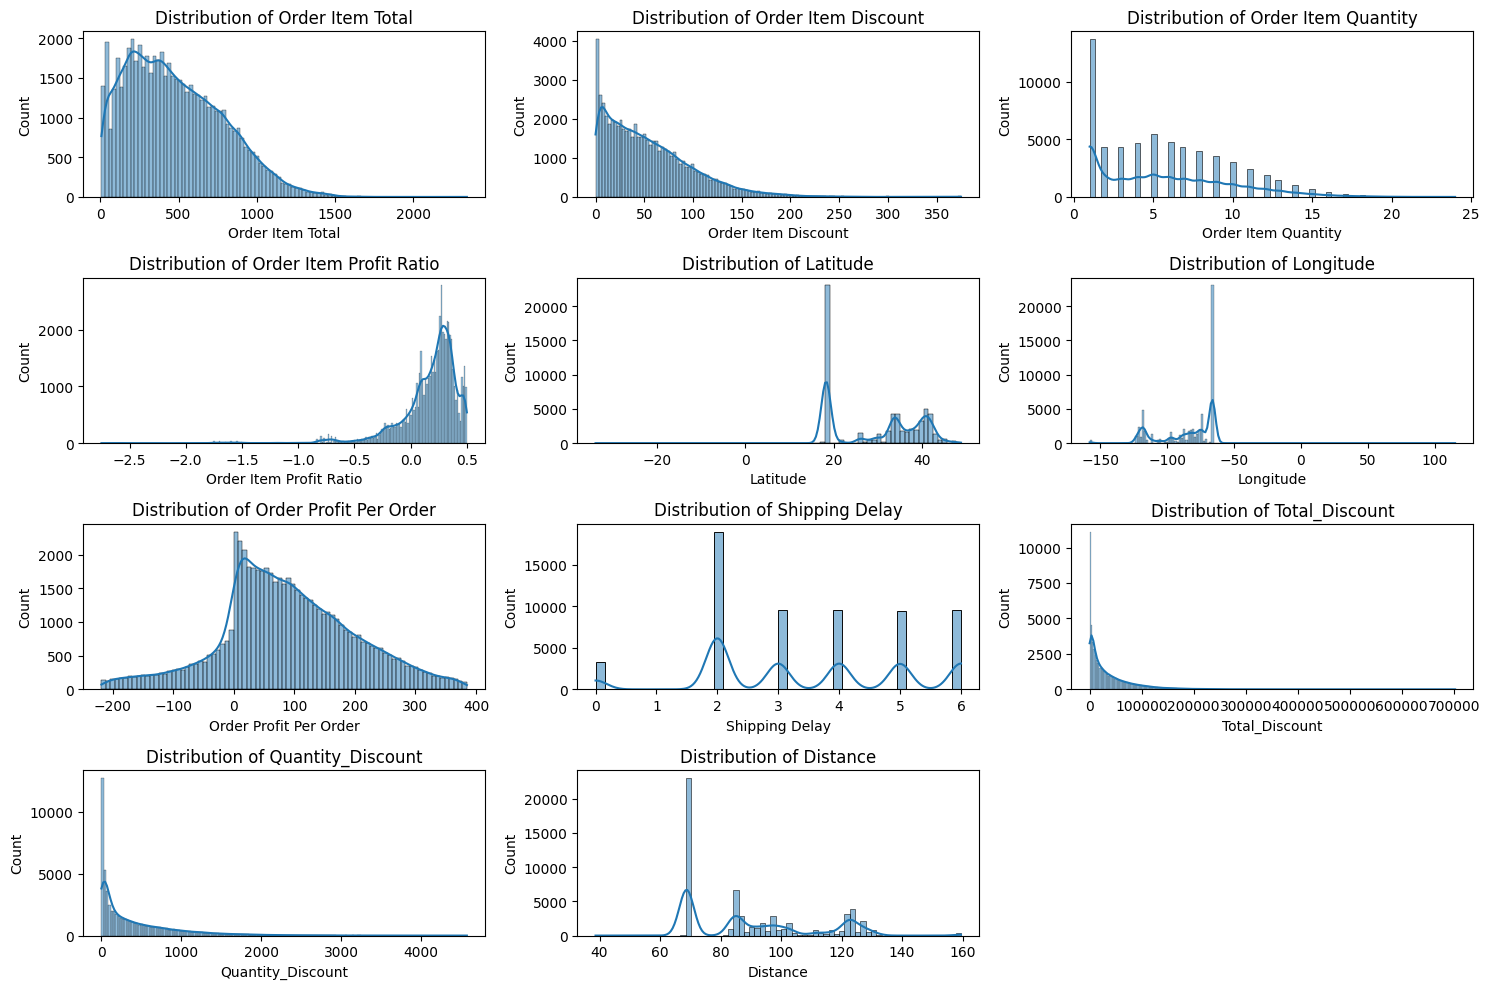

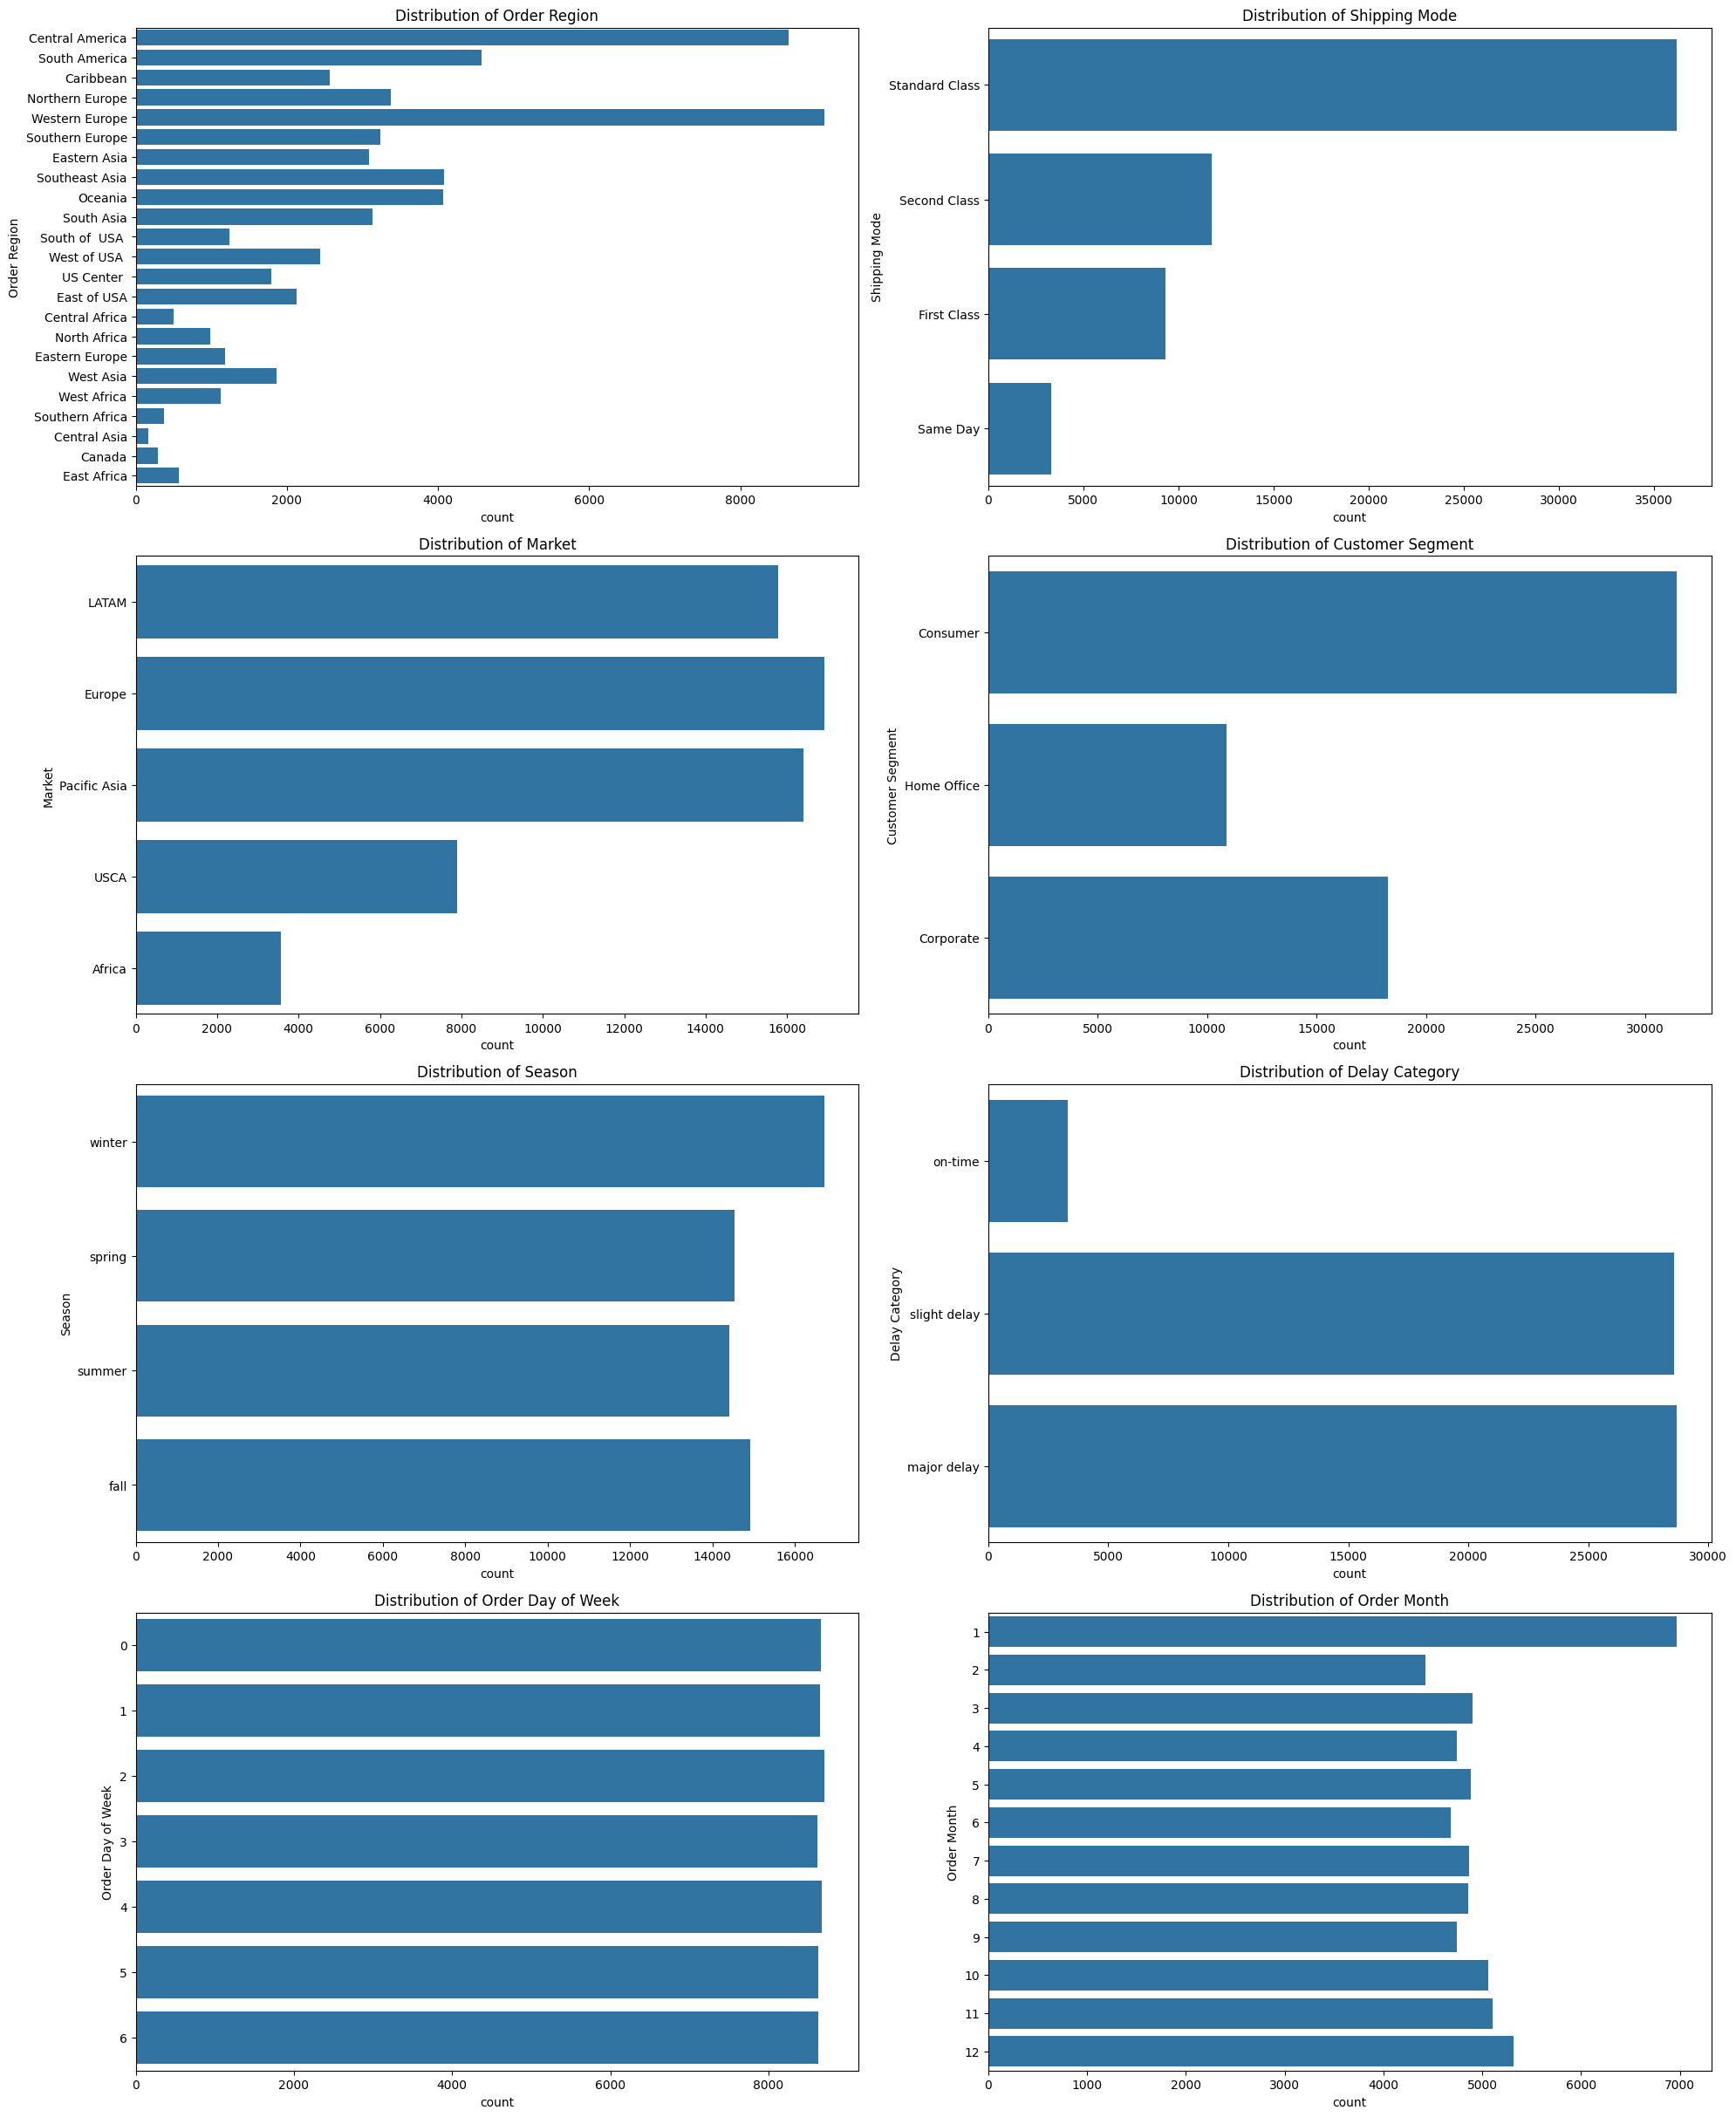

In [10]:
# 7. Visualisasi distribusi data numerik
numeric_cols = ['Order Item Total', 'Order Item Discount', 'Order Item Quantity',
                'Order Item Profit Ratio', 'Latitude', 'Longitude', 'Order Profit Per Order',
                'Shipping Delay', 'Total_Discount', 'Quantity_Discount', 'Distance']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 3, i + 1)
    sns.histplot(order_data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

# 8. Visualisasi distribusi data kategorikal
categorical_cols = ['Order Region', 'Shipping Mode', 'Market', 'Customer Segment', 'Season', 'Delay Category', 'Order Day of Week', 'Order Month']
plt.figure(figsize=(20, 30))
for i, col in enumerate(categorical_cols):
    plt.subplot(5, 2, i + 1)
    sns.countplot(y=col, data=order_data)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

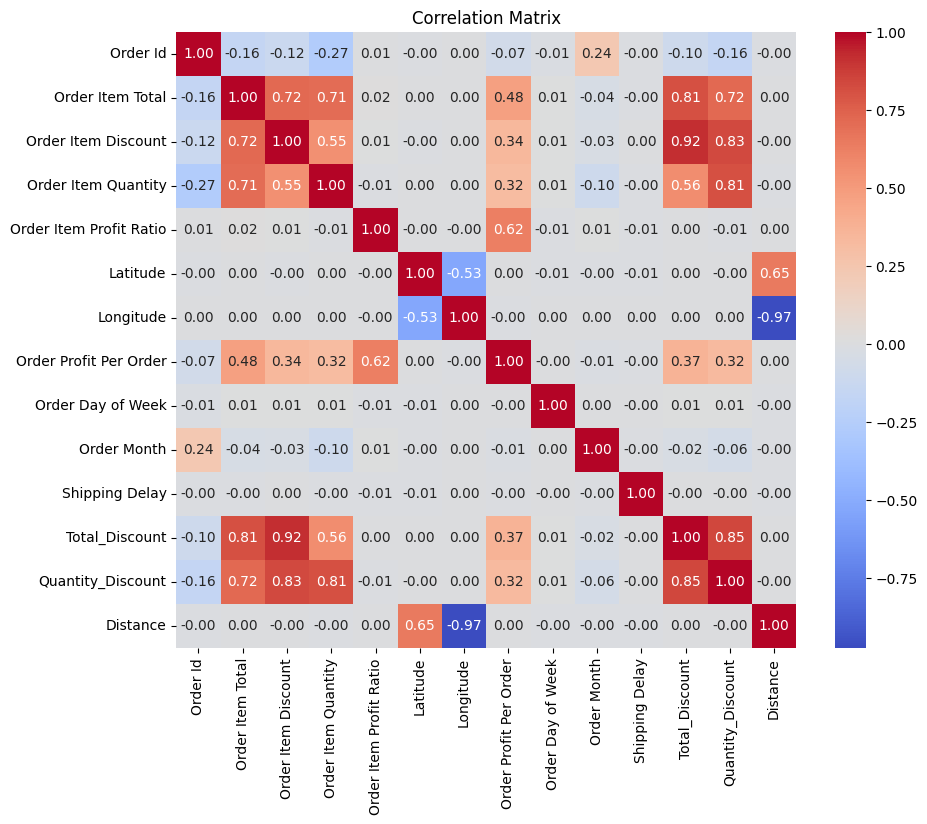

In [11]:
# 9. Analisis korelasi antar variabel numerik
plt.figure(figsize=(10, 8))

correlation_matrix = order_data.select_dtypes(include=np.number).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

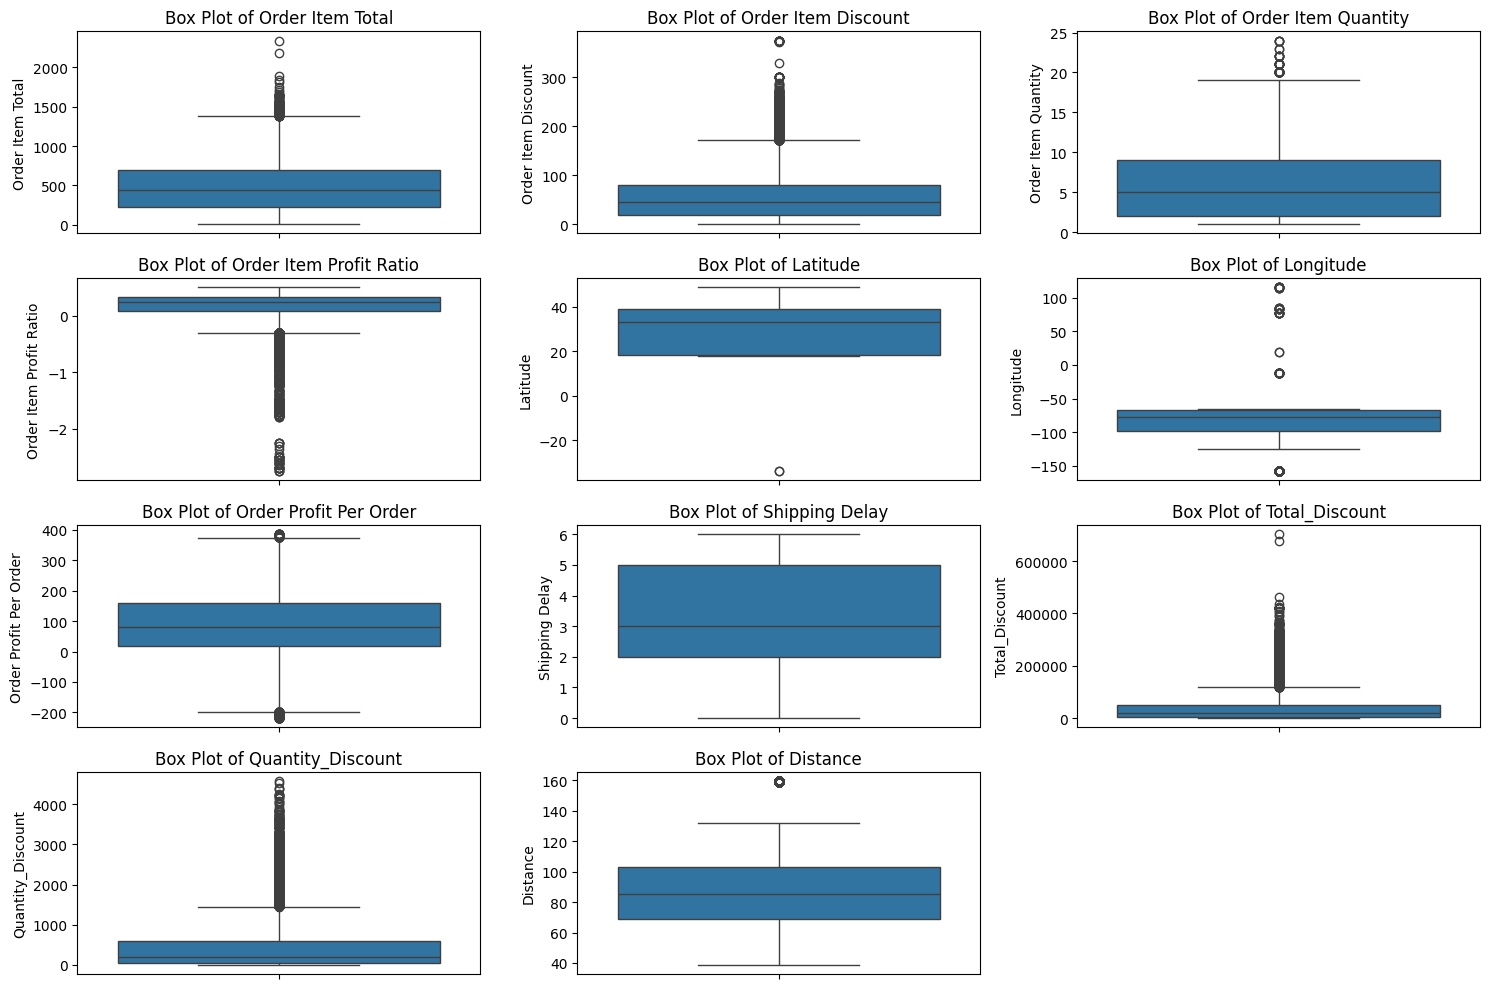

In [12]:
# 10. Visualisasi Box Plot
plt.figure(figsize=(15, 10))

numeric_coll = ['Order Item Total', 'Order Item Discount', 'Order Item Quantity',
                'Order Item Profit Ratio', 'Latitude', 'Longitude', 'Order Profit Per Order',
                'Shipping Delay', 'Total_Discount', 'Quantity_Discount', 'Distance']

for i, feature in enumerate(numeric_coll):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(y=order_data[feature])
    plt.title(f'Box Plot of {feature}')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

## **Split Dataset**

In [13]:
# 11. Memilih fitur dan target
features = ['Order Item Total', 'Order Item Quantity', 'Order Item Profit Ratio',
            'Shipping Delay', 'Order Region', 'Shipping Mode', 'Market',
            'Order Day of Week', 'Order Month', 'Season', 'Delay Category', 'Customer Segment', 'Order Status',
            'Total_Discount','Distance']
target = 'Order Profit Per Order'
X = order_data[features]
y = order_data[target]

In [14]:
# 12. Membagi data berdasarkan urutan waktu (60% train, 20% val, 20% test)
train_size = int(0.6 * len(X))
val_size = int(0.2 * len(X))
X_train, X_val, X_test = X[:train_size], X[train_size:train_size+val_size], X[train_size+val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size+val_size], y[train_size+val_size:]

## **Preprocessing Data**

In [15]:
# 13. Encoding fitur kategorikal
categorical_features = ['Order Region', 'Shipping Mode', 'Market', 'Order Day of Week', 'Order Month', 'Season', 'Delay Category', 'Customer Segment', 'Order Status']
numeric_features = ['Order Item Total', 'Order Item Quantity', 'Order Item Profit Ratio','Total_Discount','Distance',
            'Shipping Delay']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# 14. Preprocessing data
X_train_transformed = preprocessor.fit_transform(X_train)
X_val_transformed = preprocessor.transform(X_val)
X_test_transformed = preprocessor.transform(X_test)

## **Modeling**

### LGBM REGRESSOR

In [16]:
# 15. Membuat model LGBM Regreso
from lightgbm import LGBMRegressor, early_stopping
from hyperopt import fmin, tpe, hp, Trials
from sklearn.metrics import r2_score

# Mendefiniskan fungsi objective Bayesian Optimization
def lgb_objective(params):
    model = LGBMRegressor(
        num_leaves=int(params['num_leaves']),  # Convert to int
        learning_rate=params['learning_rate'],
        n_estimators=int(params['n_estimators']),  # Convert to int
        max_depth=int(params['max_depth']),  # Convert to int
        min_child_samples=int(params['min_child_samples']),  # Convert to int
        subsample=params['subsample'],
        random_state=42
    )

    # Check NaN values
    X_train_transformed_clean = np.nan_to_num(X_train_transformed)
    X_val_transformed_clean = np.nan_to_num(X_val_transformed)

    # Train model menggunakan callbacks early stopping
    model.fit(
        X_train_transformed_clean,
        y_train,
        eval_set=[(X_val_transformed_clean, y_val)],
        eval_metric='rmse',
        callbacks=[early_stopping(stopping_rounds=50, verbose=100)]
    )

    y_pred = model.predict(X_val_transformed_clean)

    # Debugging output
    print("y_pred shape:", y_pred.shape)
    print("y_val shape:", y_val.shape)
    print("First 5 Predictions:", y_pred[:5])
    print("First 5 Actual Values:", y_val[:5])

    return -r2_score(y_val, y_pred)

# Mendefinisikan hyperparameter search space
space = {
    'num_leaves': hp.quniform('num_leaves', 10, 100, 1),
    'learning_rate': hp.loguniform('learning_rate', -3, 0),
    'n_estimators': hp.quniform('n_estimators', 50, 500, 10),
    'max_depth': hp.quniform('max_depth', 3, 12, 1),
    'min_child_samples': hp.quniform('min_child_samples', 10, 50, 5),
    'subsample': hp.uniform('subsample', 0.7, 1.0)
}

# Bayesian Optimization with Hyperopt
trials = Trials()
best = fmin(
    fn=lgb_objective,
    space=space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials
)

# Convert `best` hyperparameters ke tipe yang sesuai
best = {k: int(v) if k in ['num_leaves', 'n_estimators', 'max_depth', 'min_child_samples'] else v for k, v in best.items()}

# Train LightGBM dengan optimized hyperparameters
lgb_model = LGBMRegressor(
    num_leaves=best['num_leaves'],
    learning_rate=best['learning_rate'],
    n_estimators=best['n_estimators'],
    max_depth=best['max_depth'],
    min_child_samples=best['min_child_samples'],
    subsample=best['subsample'],
    random_state=42
)

# Memastikan tidak ada NaNs di data
X_train_transformed = np.nan_to_num(X_train_transformed)
X_val_transformed = np.nan_to_num(X_val_transformed)

# Fit model dengan early stopping method
lgb_model.fit(
    X_train_transformed,
    y_train,
    eval_set=[(X_val_transformed, y_val)],
    eval_metric='rmse',
    callbacks=[early_stopping(stopping_rounds=50, verbose=100)]
)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004050 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1189
[LightGBM] [Info] Number of data points in the train set: 36338, number of used features: 76
[LightGBM] [Info] Start training from score 93.262254
Training until validation scores don't improve for 50 rounds
  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Early stopping, best iteration is:
[71]	valid_0's rmse: 39.5746	valid_0's l2: 1566.15
y_pred shape:
(12112,)
y_val shape:
(12112,)
First 5 Predictions:
[185.86558101  81.29139572 121.37731356  21.85090169 143.07122434]
First 5 Actual Values:
39519    173.599996
39520     76.349998
39521    138.540003
39522     22.620001
39523    137.140001
Name: Order Profit Per Order, dtype: float64
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002422 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1189
[LightGBM] [Info] Number of data points in the train set: 36338, number of used features: 76
  2%|▏         | 1/50 [00:00<00:35,  1.38trial/s, best loss: -0.8832759605104027]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



[LightGBM] [Info] Start training from score 93.262254
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002087 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1189
[LightGBM] [Info] Number of data points in the train set: 36338, number of used features: 76
[LightGBM] [Info] Start training from score 93.262254
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[10]	valid_0's rmse: 40.3361	valid_0's l2: 1627
y_pred shape:
(12112,)
y_val shape:
(12112,)
First 5 Predictions:
[190.915272    70.39226002 117.07287588  22.47682586 151.44131279]
First 5 Actual Values:
39519    173.599996
39520     76.349998
39521    138.540003
39522     22.620001
39523    137.140001
Name: Order Profit Per Order, dtype: float64
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003283 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1189
[LightGBM] [Info] Number of data points in the train set: 36338, number of used features: 76
[LightGBM] [Info] Start training from score 93.262254
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



[LightGBM] [Info] Start training from score 93.262254
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



y_pred shape:
(12112,)
y_val shape:
(12112,)
First 5 Predictions:
[187.93230327  86.01125788 117.24616705  17.75020181 143.07130102]
First 5 Actual Values:
39519    173.599996
39520     76.349998
39521    138.540003
39522     22.620001
39523    137.140001
Name: Order Profit Per Order, dtype: float64
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1189
[LightGBM] [Info] Number of data points in the train set: 36338, number of used features: 76
[LightGBM] [Info] Start training from score 93.262254
 12%|█▏        | 6/50 [00:09<01:25,  1.95s/trial, best loss: -0.8832846715947426]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[6]	valid_0's rmse: 40.9065	valid_0's l2: 1673.34
y_pred shape:
(12112,)
y_val shape:
(12112,)
First 5 Predictions:
[185.99407633  63.11127833 123.77827426  16.83315816 158.96225302]
First 5 Actual Values:
39519    173.599996
39520     76.349998
39521    138.540003
39522     22.620001
39523    137.140001
Name: Order Profit Per Order, dtype: float64
 14%|█▍        | 7/50 [00:09<01:05,  1.52s/trial, best loss: -0.8832846715947426]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015374 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1189
[LightGBM] [Info] Number of data points in the train set: 36338, number of used features: 76
[LightGBM] [Info] Start training from score 93.262254
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[29]	valid_0's rmse: 39.7081	valid_0's l2: 1576.74
y_pred shape:
(12112,)
y_val shape:
(12112,)
First 5 Predictions:
[186.29416236  82.88380371 125.78957482  21.17261941 145.06615678]
First 5 Actual Values:
39519    173.599996
39520     76.349998
39521    138.540003
39522     22.620001
39523    137.140001
Name: Order Profit Per Order, dtype: float64
 16%|█▌        | 8/50 [00:10<00:58,  1.39s/trial, best loss: -0.8832846715947426]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019446 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1189
[LightGBM] [Info] Number of data points in the train set: 36338, number of used features: 76
[LightGBM] [Info] Start training from score 93.262254
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009943 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1189
[LightGBM] [Info] Number of data points in the train set: 36338, number of used features: 76
[LightGBM] [Info] Start training from score 93.262254
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003268 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1189
[LightGBM] [Info] Number of data points in the train set: 36338, number of used features: 76
[LightGBM] [Info] Start training from score 93.262254
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1189
[LightGBM] [Info] Number of data points in the train set: 36338, number of used features: 76
[LightGBM] [Info] Start training from score 93.262254
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[83]	valid_0's rmse: 39.6408	valid_0's l2: 1571.39
y_pred shape:
(12112,)
y_val shape:
(12112,)
First 5 Predictions:
[191.57369294  85.93474304 125.65146294  21.02067851 142.15147914]
First 5 Actual Values:
39519    173.599996
39520     76.349998
39521    138.540003
39522     22.620001
39523    137.140001
Name: Order Profit Per Order, dtype: float64
 24%|██▍       | 12/50 [00:16<00:58,  1.53s/trial, best loss: -0.8834816348497588]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003380 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1189
[LightGBM] [Info] Number of data points in the train set: 36338, number of used features: 76
[LightGBM] [Info] Start training from score 93.262254
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[70]	valid_0's rmse: 39.5618	valid_0's l2: 1565.14
y_pred shape:
(12112,)
y_val shape:
(12112,)
First 5 Predictions:
[189.57250918  83.65527274 124.17440159  21.96884633 145.26431268]
First 5 Actual Values:
39519    173.599996
39520     76.349998
39521    138.540003
39522     22.620001
39523    137.140001
Name: Order Profit Per Order, dtype: float64
 26%|██▌       | 13/50 [00:17<00:50,  1.36s/trial, best loss: -0.8834816348497588]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003048 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1189
[LightGBM] [Info] Number of data points in the train set: 36338, number of used features: 76
[LightGBM] [Info] Start training from score 93.262254
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[21]	valid_0's rmse: 39.6682	valid_0's l2: 1573.56
y_pred shape:
(12112,)
y_val shape:
(12112,)
First 5 Predictions:
[188.01421093  78.18538703 123.14002093  19.56559328 145.63312291]
First 5 Actual Values:
39519    173.599996
39520     76.349998
39521    138.540003
39522     22.620001
39523    137.140001
Name: Order Profit Per Order, dtype: float64
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003528 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1189
[LightGBM] [Info] Number of data points in the train set: 36338, number of used features: 76
 30%|███       | 15/50 [00:19<00:35,  1.03s/trial, best loss: -0.8834816348497588]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



[LightGBM] [Info] Start training from score 93.262254
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004137 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1189
[LightGBM] [Info] Number of data points in the train set: 36338, number of used features: 76
[LightGBM] [Info] Start training from score 93.262254
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[9]	valid_0's rmse: 40.1017	valid_0's l2: 1608.14
y_pred shape:
(12112,)
y_val shape:
(12112,)
First 5 Predictions:
[191.02819937  78.65605324 121.21528485  24.97802977 138.39754838]
First 5 Actual Values:
39519    173.599996
39520     76.349998
39521    138.540003
39522     22.620001
39523    137.140001
Name: Order Profit Per Order, dtype: floa

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



[LightGBM] [Info] Start training from score 93.262254
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[11]	valid_0's rmse: 39.9726	valid_0's l2: 1597.81
y_pred shape:
(12112,)
y_val shape:
(12112,)
First 5 Predictions:
[186.94704826  82.31644408 121.09179692  22.67683339 139.52062718]
First 5 Actual Values:
39519    173.599996
39520     76.349998
39521    138.540003
39522     22.620001
39523    137.140001
Name: Order Profit Per Order, dtype: float64
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002020 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1189


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



[LightGBM] [Info] Number of data points in the train set: 36338, number of used features: 76
[LightGBM] [Info] Start training from score 93.262254
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



[LightGBM] [Info] Total Bins 1189
[LightGBM] [Info] Number of data points in the train set: 36338, number of used features: 76
[LightGBM] [Info] Start training from score 93.262254
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[79]	valid_0's rmse: 39.8061	valid_0's l2: 1584.52
y_pred shape:
(12112,)
y_val shape:
(12112,)
First 5 Predictions:
[190.94722304  85.42641796 124.61020205  21.57232774 143.45302995]
First 5 Actual Values:
39519    173.599996
39520     76.349998
39521    138.540003
39522     22.620001
39523    137.140001
Name: Order Profit Per Order, dtype: float64
 42%|████▏     | 21/50 [00:24<00:31,  1.10s/trial, best loss: -0.8834816348497588]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1189
[LightGBM] [Info] Number of data points in the train set: 36338, number of used features: 76
[LightGBM] [Info] Start training from score 93.262254
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[74]	valid_0's rmse: 39.5628	valid_0's l2: 1565.22
y_pred shape:
(12112,)
y_val shape:
(12112,)
First 5 Predictions:
[189.95082377  83.33174186 124.96699031  21.04038608 145.47286217]
First 5 Actual Values:
39519    173.599996
39520     76.349998
39521    138.540003
39522     22.620001
39523    137.140001
Name: Order Profit Per Order, dtype: float64
 44%|████▍     | 22/50 [00:26<00:31,  1.13s/trial, best loss: -0.8834816348497588]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003368 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1189
[LightGBM] [Info] Number of data points in the train set: 36338, number of used features: 76
[LightGBM] [Info] Start training from score 93.262254
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[37]	valid_0's rmse: 39.6128	valid_0's l2: 1569.18
y_pred shape:
(12112,)
y_val shape:
(12112,)
First 5 Predictions:
[191.58401446  83.74399384 124.19855013  21.99326921 144.98209685]
First 5 Actual Values:
39519    173.599996
39520     76.349998
39521    138.540003
39522     22.620001
39523    137.140001
Name: Order Profit Per Order, dtype: float64
 46%|████▌     | 23/50 [00:27<00:29,  1.10s/trial, best loss: -0.8834816348497588]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003362 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1189
[LightGBM] [Info] Number of data points in the train set: 36338, number of used features: 76
[LightGBM] [Info] Start training from score 93.262254
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003563 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1189
[LightGBM] [Info] Number of data points in the train set: 36338, number of used features: 76
[LightGBM] [Info] Start training from score 93.262254
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
 48%|████▊     | 24/50 [00:30<00:41,  1.61s/trial, best loss: -0.8834816348497588]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1189
[LightGBM] [Info] Number of data points in the train set: 36338, number of used features: 76
[LightGBM] [Info] Start training from score 93.262254
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003620 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1189
[LightGBM] [Info] Number of data points in the train set: 36338, number of used features: 76
[LightGBM] [Info] Start training from score 93.262254
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[76]	valid_0's rmse: 39.6334	valid_0's l2: 1570.8
y_pred shape:
(12112,)
y_val shape:
(12112,)
First 5 Predictions:
[177.21787296  84.6006603  116.92292822  22.0561757  142.98330114]
First 5 Actual Values:
39519    173.599996
39520     76.349998
39521    138.540003
39522     22.620001
39523    137.140001
Name: Order Profit Per Order, dtype: float64
 54%|█████▍    | 27/50 [00:34<00:35,  1.53s/trial, best loss: -0.8834816348497588]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1189
[LightGBM] [Info] Number of data points in the train set: 36338, number of used features: 76
[LightGBM] [Info] Start training from score 93.262254
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010603 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1189
[LightGBM] [Info] Number of data points in the train set: 36338, number of used features: 76
[LightGBM] [Info] Start training from score 93.262254
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005867 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1189
[LightGBM] [Info] Number of data points in the train set: 36338, number of used features: 76
[LightGBM] [Info] Start training from score 93.262254
 58%|█████▊    | 29/50 [00:39<00:41,  1.97s/trial, best loss: -0.8836775517105245]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003638 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1189
[LightGBM] [Info] Number of data points in the train set: 36338, number of used features: 76
[LightGBM] [Info] Start training from score 93.262254
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Early stopping, best iteration is:
[34]	valid_0's rmse: 39.6344	valid_0's l2: 1570.89
y_pred shape:
(12112,)
y_val shape:
(12112,)
First 5 Predictions:
[181.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011101 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1189
[LightGBM] [Info] Number of data points in the train set: 36338, number of used features: 76
[LightGBM] [Info] Start training from score 93.262254
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1189
[LightGBM] [Info] Number of data points in the train set: 36338, number of used features: 76
[LightGBM] [Info] Start training from score 93.262254
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004887 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1189
[LightGBM] [Info] Number of data points in the train set: 36338, number of used features: 76
 66%|██████▌   | 33/50 [00:46<00:30,  1.82s/trial, best loss: -0.8836775517105245]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



[LightGBM] [Info] Start training from score 93.262254
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005479 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1189
[LightGBM] [Info] Number of data points in the train set: 36338, number of used features: 76
[LightGBM] [Info] Start training from score 93.262254
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1189
[LightGBM] [Info] Number of data points in the train set: 36338, number of used features: 76
[LightGBM] [Info] Start training from score 93.262254
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016712 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1189
[LightGBM] [Info] Number of data points in the train set: 36338, number of used features: 76
[LightGBM] [Info] Start training from score 93.262254
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1189
[LightGBM] [Info] Number of data points in the train set: 36338, number of used features: 76
[LightGBM] [Info] Start training from score 93.262254
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003383 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1189
[LightGBM] [Info] Number of data points in the train set: 36338, number of used features: 76
[LightGBM] [Info] Start training from score 93.262254
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1189
[LightGBM] [Info] Number of data points in the train set: 36338, number of used features: 76
[LightGBM] [Info] Start training from score 93.262254
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012401 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1189
[LightGBM] [Info] Number of data points in the train set: 36338, number of used features: 76
[LightGBM] [Info] Start training from score 93.262254
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016789 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1189
[LightGBM] [Info] Number of data points in the train set: 36338, number of used features: 76
[LightGBM] [Info] Start training from score 93.262254
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003347 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1189
[LightGBM] [Info] Number of data points in the train set: 36338, number of used features: 76
[LightGBM] [Info] Start training from score 93.262254
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003504 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1189
[LightGBM] [Info] Number of data points in the train set: 36338, number of used features: 76
[LightGBM] [Info] Start training from score 93.262254
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003301 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1189
[LightGBM] [Info] Number of data points in the train set: 36338, number of used features: 76
[LightGBM] [Info] Start training from score 93.262254
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016518 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1189
[LightGBM] [Info] Number of data points in the train set: 36338, number of used features: 76
[LightGBM] [Info] Start training from score 93.262254
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



[LightGBM] [Info] Start training from score 93.262254
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003299 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1189
[LightGBM] [Info] Number of data points in the train set: 36338, number of used features: 76
[LightGBM] [Info] Start training from score 93.262254
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012917 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1189
[LightGBM] [Info] Number of data points in the train set: 36338, number of used features: 76
[LightGBM] [Info] Start training from score 93.262254
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1189
[LightGBM] [Info] Number of data points in the train set: 36338, number of used features: 76
[LightGBM] [Info] Start training from score 93.262254
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004392 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1189
[LightGBM] [Info] Number of data points in the train set: 36338, number of used features: 76
[LightGBM] [Info] Start training from score 93.262254
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

LGBMRegressor(learning_rate=0.049916569349533334, max_depth=5,
              min_child_samples=35, n_estimators=250, num_leaves=69,
              random_state=42, subsample=0.7614913617787906)

### XG BOOST

In [17]:
# 16. Membuat Model XG BOOST
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    eval_metric='rmse',  # ✅ Tetapkan eval_metric di konstruktor
    random_state=42
)

# Latih model dengan early stopping
xgb_model.fit(
    X_train_transformed,
    y_train,
    eval_set=[(X_val_transformed, y_val)]
)

[0]	validation_0-rmse:86.78621
[1]	validation_0-rmse:67.70652
[2]	validation_0-rmse:55.61495
[3]	validation_0-rmse:48.40349
[4]	validation_0-rmse:44.36578
[5]	validation_0-rmse:42.08395
[6]	validation_0-rmse:40.90032
[7]	validation_0-rmse:40.31570
[8]	validation_0-rmse:40.03436
[9]	validation_0-rmse:39.86106
[10]	validation_0-rmse:39.77828
[11]	validation_0-rmse:39.74254
[12]	validation_0-rmse:39.75172
[13]	validation_0-rmse:39.80439
[14]	validation_0-rmse:39.77677
[15]	validation_0-rmse:39.85413
[16]	validation_0-rmse:39.86541
[17]	validation_0-rmse:39.89917
[18]	validation_0-rmse:39.87610
[19]	validation_0-rmse:39.91148
[20]	validation_0-rmse:39.92718
[21]	validation_0-rmse:39.95874
[22]	validation_0-rmse:39.98731
[23]	validation_0-rmse:40.00841
[24]	validation_0-rmse:40.04113
[25]	validation_0-rmse:40.02838
[26]	validation_0-rmse:40.04726
[27]	validation_0-rmse:40.08980
[28]	validation_0-rmse:40.10058
[29]	validation_0-rmse:40.12283
[30]	validation_0-rmse:40.11005
[31]	validation_0-

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### CAT BOOST

In [19]:
# 16. Membuat Model CatBoost
cb_model = cb.CatBoostRegressor(
    iterations=800,
    learning_rate=0.05,
    depth=6,
    l2_leaf_reg=3,
    random_state=42,
    verbose=100
)

cb_model.fit(
    X_train_transformed, y_train,
    eval_set=[(X_val_transformed, y_val)],
    early_stopping_rounds=30
)

0:	learn: 109.8001843	test: 111.3651476	best: 111.3651476 (0)	total: 57ms	remaining: 45.6s
100:	learn: 40.0950089	test: 39.9221546	best: 39.9221546 (100)	total: 800ms	remaining: 5.53s
200:	learn: 39.3549755	test: 39.5334428	best: 39.5334428 (200)	total: 1.5s	remaining: 4.46s
300:	learn: 38.6928035	test: 39.4392944	best: 39.4388774 (282)	total: 2.17s	remaining: 3.6s
Stopped by overfitting detector  (30 iterations wait)

bestTest = 39.43887743
bestIteration = 282

Shrink model to first 283 iterations.


### STACKING ENSEMBLE

In [20]:
# 17. Membuat Stacking Ensemble dari model yang sudah dibuat
from sklearn.linear_model import ElasticNet
estimators = [
    ('lgb', lgb_model),
    ('xgb', xgb_model),
    ('cb', cb_model)

]
# Menggunakan model ElasricNet untuk final estimator
stacking_model = StackingRegressor(estimators=estimators, final_estimator=ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42))
stacking_model.fit(X_train_transformed, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002018 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1189
[LightGBM] [Info] Number of data points in the train set: 36338, number of used features: 76
[LightGBM] [Info] Start training from score 93.262254
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001647 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1190
[LightGBM] [Info] Number of data points in the train set: 29070, number of used features: 76
[LightGBM] [Info] Start training from score 93.375736
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005104 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1188
[LightGBM] [Info] Number of data points in the train set: 29070, number of used features: 75
[LightGBM] [Info] Start training from score 93.581410
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001644 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1190
[LightGBM] [Info] Number of data points in the train set: 29071, number of used features: 76
[LightGBM] [Info] Start training from score 93.262974
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001634 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1169
[LightGBM] [Info] Number of data points in the train set: 29071, number of used features: 66
[LightGBM] [Info] Start training from score 92.753682
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


0:	learn: 109.6500470	total: 7.37ms	remaining: 5.88s
100:	learn: 40.2327056	total: 636ms	remaining: 4.4s
200:	learn: 39.3266390	total: 1.22s	remaining: 3.63s
300:	learn: 38.5130390	total: 1.82s	remaining: 3.02s
400:	learn: 37.7728775	total: 2.4s	remaining: 2.39s
500:	learn: 37.0945019	total: 3.01s	remaining: 1.79s
600:	learn: 36.4805238	total: 3.6s	remaining: 1.19s
700:	learn: 35.9046102	total: 4.21s	remaining: 595ms
799:	learn: 35.3816363	total: 4.82s	remaining: 0us
0:	learn: 109.9388927	total: 6.9ms	remaining: 5.51s
100:	learn: 39.9267274	total: 618ms	remaining: 4.28s
200:	learn: 39.0775039	total: 1.23s	remaining: 3.67s
300:	learn: 38.3427739	total: 1.84s	remaining: 3.04s
400:	learn: 37.7033457	total: 2.42s	remaining: 2.4s
500:	learn: 37.0681516	total: 3.03s	remaining: 1.81s
600:	learn: 36.3808230	total: 3.63s	remaining: 1.2s
700:	learn: 35.7822382	total: 4.73s	remaining: 669ms
799:	learn: 35.2197341	total: 6.17s	remaining: 0us
0:	learn: 109.8358685	total: 24.8ms	remaining: 19.8s
100

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.956e+07, tolerance: 4.741e+04
  model = cd_fast.enet_coordinate_descent(


StackingRegressor(estimators=[('lgb',
                               LGBMRegressor(learning_rate=0.049916569349533334,
                                             max_depth=5, min_child_samples=35,
                                             n_estimators=250, num_leaves=69,
                                             random_state=42,
                                             subsample=0.7614913617787906)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stop...
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                              ('cb',
                               <catboost.core.CatBoostRegressor object at 0x7999717e5790>)],
                  final_estimator=ElasticNet(alpha=0.1, random_state=42))

## **Prediction & Evaluation**

In [21]:
# 18. Prediksi
y_pred_lgb = lgb_model.predict(X_test_transformed)
y_pred_xgb = xgb_model.predict(X_test_transformed)
y_pred_cb = cb_model.predict(X_test_transformed)
y_pred_stack = stacking_model.predict(X_test_transformed)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [22]:
# 19. Evaluasi model
models = {
    'LightGBM': y_pred_lgb,
    'XGBoost': y_pred_xgb,
    'CatBoost': y_pred_cb,
    'Stacking': y_pred_stack
}

for name, y_pred in models.items():
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{name} Performance:")
    print(f" - MAE: {mae:.2f}")
    print(f" - RMSE: {rmse:.2f}")
    print(f" - R²: {r2:.2f}\n")

LightGBM Performance:
 - MAE: 11.46
 - RMSE: 25.69
 - R²: 0.93

XGBoost Performance:
 - MAE: 12.67
 - RMSE: 27.18
 - R²: 0.92

CatBoost Performance:
 - MAE: 11.96
 - RMSE: 25.67
 - R²: 0.93

Stacking Performance:
 - MAE: 11.20
 - RMSE: 25.51
 - R²: 0.93



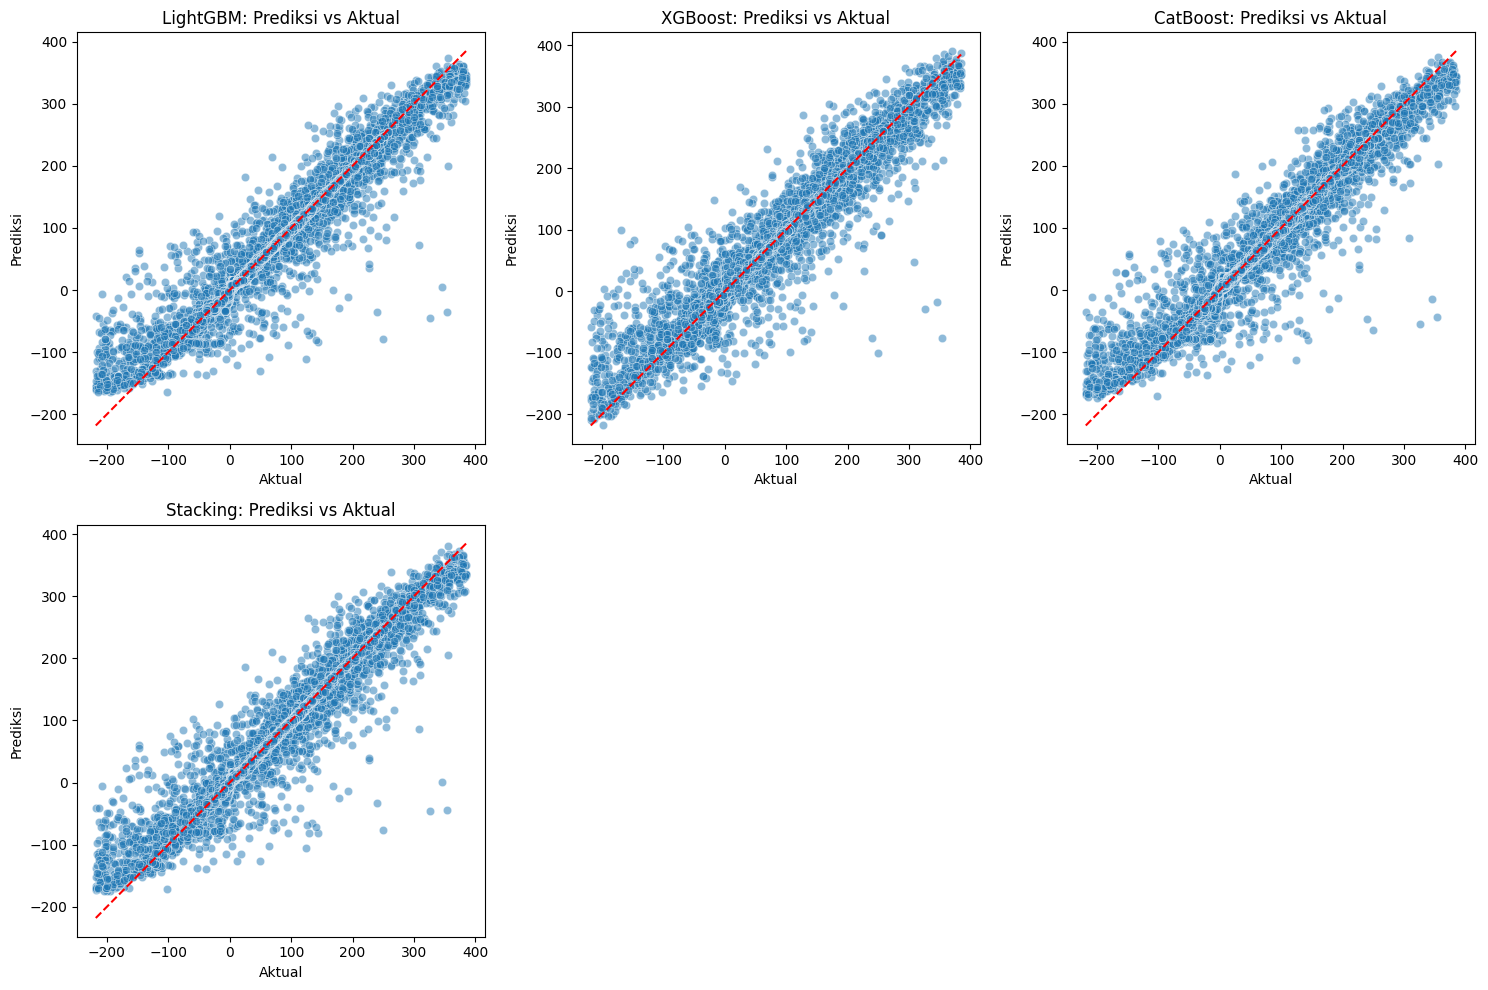

In [23]:
# 20. Visualisasi Prediksi vs Aktual
plt.figure(figsize=(15, 10))
for i, (name, y_pred) in enumerate(models.items(), 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(f'{name}: Prediksi vs Aktual')
    plt.xlabel('Aktual')
    plt.ylabel('Prediksi')
plt.tight_layout()
plt.show()

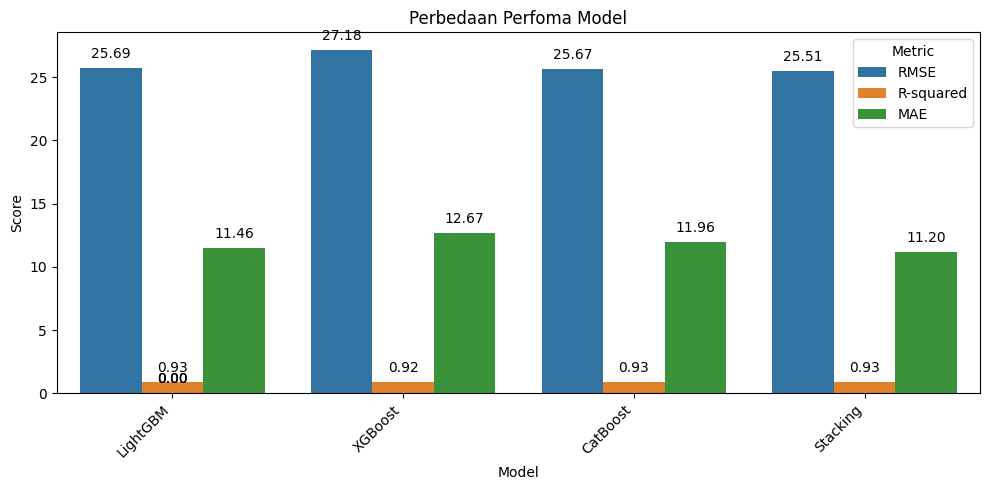

In [36]:
# 21. Visualisasi Perbedaan Evaluasi
model_names = ['LightGBM', 'XGBoost', 'CatBoost', 'Stacking']
y_preds = [y_pred_lgb, y_pred_xgb, y_pred_cb, y_pred_stack]

rmse_scores = []
r2_scores = []
mae_scores = []

for name, y_pred in zip(model_names, y_preds):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    rmse_scores.append(rmse)
    r2_scores.append(r2)
    mae_scores.append(mae)



results_df = pd.DataFrame({
    'Model': model_names,
    'RMSE': rmse_scores,
    'R-squared': r2_scores,
    'MAE': mae_scores
})


melted_df = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(10, 5))
ax = sns.barplot(x='Model', y='Score', hue='Metric', data=melted_df)
plt.title('Perbedaan Perfoma Model')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.show()